In [2]:
import pandas as pd
import numpy as np

import tubesml as tml

from source.validate import random_split, yearly_split
from source.report import report_points, report_victory, yearly_wrapper

from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [3]:
df = pd.read_csv('data/processed_women/training_data.csv')

df.head()

,Season,DayNum,Team1,Team2,target,target_points,T1_Loc,T2_Loc,ID,T1_Ast,...,delta_off_edge,delta_def_edge,stage_Round1,stage_Round2,stage_Round3,stage_Round4,stage_final,stage_finalfour,T1_quality,T2_quality
0,2010,138,3124,3201,1,14,0,0,2010_3124_3201,14.687500,...,15.506357,22.033034,1,0,0,0,0,0,2961.988207,663.448704
1,2010,138,3173,3395,1,1,0,0,2010_3173_3395,14.461538,...,15.091164,16.370410,1,0,0,0,0,0,980.038632,597.619818
2,2010,138,3181,3214,1,35,1,-1,2010_3181_3214,14.250000,...,18.300842,14.533827,1,0,0,0,0,0,5829.890930,28.912893
3,2010,138,3199,3256,1,14,1,-1,2010_3199_3256,15.333333,...,16.225874,16.129244,1,0,0,0,0,0,2367.995688,267.981411
4,2010,138,3207,3265,1,20,0,0,2010_3207_3265,15.866667,...,11.551791,17.504158,1,0,0,0,0,0,2294.843970,215.010415


In [4]:
kfolds = KFold(n_splits=7, shuffle=True, random_state=23)

In [214]:
df['seed_round1'] = 0
df['seed_round2'] = 0

df.loc[(df.T1_Seed < 5) & (df.stage_Round1 == 1), 'seed_round1'] = 1
df.loc[(df.T1_Seed < 2) & (df.stage_Round2 == 1), 'seed_round2'] = 1

df['off_edge_Seed'] = df['delta_Seed'] * df['delta_off_edge']
df['def_edge_Seed'] = df['delta_Seed'] * df['delta_def_edge']

df['T1_DR_edge'] = df['T1_DR_opportunity'] - df['T2_OR_opportunity']
df['T2_DR_edge'] = df['T2_DR_opportunity'] - df['T1_OR_opportunity']
df['delta_DR_edge'] = df['T1_DR_edge'] - df['T2_DR_edge']

df['T1_OR_edge'] = df['T1_OR_opportunity'] - df['T2_DR_opportunity']
df['T2_OR_edge'] = df['T2_OR_opportunity'] - df['T1_DR_opportunity']
df['delta_OR_edge'] = df['T1_OR_edge'] - df['T2_OR_edge']

# Classification


In [215]:
to_use = ['ID', 'target', 'Season']

d_car = ['Score', 'opp_score', 'high_seed']
t_car = []
l2wd_car = []
l2wt_car = []

for c in d_car:
    to_use += [f'delta_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_{c}', f'T2_{c}']
    
for c in l2wd_car:
    to_use += [f'delta_L2W_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_L2W_{c}', f'T2_L2W_{c}']
    

to_use += ['seed_round1', 'seed_round2', 'off_edge_Seed', 'def_edge_Seed']

In [218]:
score

,acc_oof,acc_test,logloss_oof,logloss_test,unsure_oof,unsure_test,year
0,0.7813,0.8333,0.4367,0.3821,16.4903,11.9048,2015
1,0.7945,0.7222,0.4265,0.4734,15.3439,13.4921,2016
2,0.7857,0.8095,0.4270,0.4593,14.9030,15.8730,2017
3,0.7963,0.7381,0.4265,0.4704,14.9030,16.6667,2018
4,0.7840,0.8095,0.4345,0.3907,15.3439,19.0476,2019
5,0.7884,0.7825,0.4302,0.4352,15.3968,15.3968,total


In [219]:
to_use = ['ID', 'target', 'Season']

d_car = ['Score', 'opp_score', 'high_seed', 'Blk']
t_car = []
l2wd_car = []
l2wt_car = []

for c in d_car:
    to_use += [f'delta_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_{c}', f'T2_{c}']
    
for c in l2wd_car:
    to_use += [f'delta_L2W_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_L2W_{c}', f'T2_L2W_{c}']
    

to_use += ['seed_round1', 'seed_round2', 'off_edge_Seed', 'def_edge_Seed']

In [224]:
score

,acc_oof,acc_test,logloss_oof,logloss_test,unsure_oof,unsure_test,year
0,0.7822,0.8254,0.4333,0.3736,15.6085,15.0794,2015
1,0.7945,0.7222,0.4221,0.4730,13.9330,14.2857,2016
2,0.7848,0.8254,0.4237,0.4508,14.7266,12.6984,2017
3,0.7972,0.7143,0.4228,0.4676,14.1093,19.8413,2018
4,0.7875,0.8095,0.4311,0.3812,15.6966,15.0794,2019
5,0.7892,0.7794,0.4266,0.4292,14.8148,15.3968,total


In [225]:
to_use = ['ID', 'target', 'Season']

d_car = ['Score', 'opp_score', 'high_seed', 'Blk', 'TO']
t_car = []
l2wd_car = []
l2wt_car = []

for c in d_car:
    to_use += [f'delta_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_{c}', f'T2_{c}']
    
for c in l2wd_car:
    to_use += [f'delta_L2W_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_L2W_{c}', f'T2_L2W_{c}']
    

to_use += ['seed_round1', 'seed_round2', 'off_edge_Seed', 'def_edge_Seed']

In [230]:
score

,acc_oof,acc_test,logloss_oof,logloss_test,unsure_oof,unsure_test,year
0,0.7831,0.8095,0.4336,0.3807,15.6966,14.2857,2015
1,0.7954,0.7143,0.4225,0.4722,14.1093,15.0794,2016
2,0.7840,0.8254,0.4240,0.4499,14.8148,13.4921,2017
3,0.7963,0.7143,0.4235,0.4668,14.1093,18.2540,2018
4,0.7901,0.8095,0.4322,0.3803,15.4321,15.0794,2019
5,0.7898,0.7746,0.4272,0.4300,14.8325,15.2381,total


In [345]:
to_use = ['ID', 'target', 'Season']

d_car = ['Score', 'opp_score', 'high_seed', 'Blk', 'TO', 'OR_opportunity']
t_car = []
l2wd_car = []
l2wt_car = []

for c in d_car:
    to_use += [f'delta_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_{c}', f'T2_{c}']
    
for c in l2wd_car:
    to_use += [f'delta_L2W_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_L2W_{c}', f'T2_L2W_{c}']
    

to_use += ['seed_round1', 'seed_round2', 'off_edge_Seed', 'def_edge_Seed']

In [337]:
score

,acc_oof,acc_test,logloss_oof,logloss_test,unsure_oof,unsure_test,year
0,0.7875,0.8175,0.4342,0.3783,15.7848,15.0794,2015
1,0.8034,0.6984,0.4211,0.4946,13.9330,11.9048,2016
2,0.7892,0.8333,0.4250,0.4506,14.2857,14.2857,2017
3,0.7989,0.7143,0.4250,0.4646,13.9330,19.0476,2018
4,0.7901,0.8095,0.4334,0.3783,15.5203,15.0794,2019
5,0.7938,0.7746,0.4278,0.4333,14.6914,15.0794,total


In [383]:
to_use = ['ID', 'target', 'Season']

d_car = ['Score', 'opp_score', 'high_seed', 'Blk', 'OR_opportunity', 'def_rating']
t_car = []
l2wd_car = []
l2wt_car = []

for c in d_car:
    to_use += [f'delta_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_{c}', f'T2_{c}']
    
for c in l2wd_car:
    to_use += [f'delta_L2W_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_L2W_{c}', f'T2_L2W_{c}']
    

to_use += ['seed_round1', 'seed_round2', 'off_edge_Seed', 'def_edge_Seed']

In [387]:
score

,acc_oof,acc_test,logloss_oof,logloss_test,unsure_oof,unsure_test,year
0,0.7928,0.8333,0.4338,0.3699,15.0794,13.4921,2015
1,0.8086,0.6984,0.4185,0.5055,13.6684,11.9048,2016
2,0.7963,0.8333,0.4232,0.4553,14.4621,16.6667,2017
3,0.8016,0.7540,0.4237,0.4589,13.9330,17.4603,2018
4,0.7954,0.8254,0.4328,0.3742,15.2557,10.3175,2019
5,0.7989,0.7889,0.4264,0.4328,14.4797,13.9683,total


In [431]:
to_use = ['ID', 'target', 'Season']

d_car = ['Score', 'opp_score', 'high_seed', 'Blk', 'OR_opportunity', 'def_rating', 'possessions']
t_car = []
l2wd_car = []
l2wt_car = []

for c in d_car:
    to_use += [f'delta_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_{c}', f'T2_{c}']
    
for c in l2wd_car:
    to_use += [f'delta_L2W_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_L2W_{c}', f'T2_L2W_{c}']
    

to_use += ['seed_round1', 'seed_round2', 'off_edge_Seed', 'def_edge_Seed']

In [435]:
score

,acc_oof,acc_test,logloss_oof,logloss_test,unsure_oof,unsure_test,year
0,0.8007,0.8254,0.4268,0.3808,15.5203,15.0794,2015
1,0.8148,0.7381,0.4156,0.4886,13.8448,17.4603,2016
2,0.8086,0.8413,0.4178,0.4536,14.5503,16.6667,2017
3,0.8113,0.7460,0.4185,0.4552,14.1975,15.8730,2018
4,0.8051,0.8175,0.4277,0.3691,16.0494,6.3492,2019
5,0.8081,0.7937,0.4213,0.4295,14.8325,14.2857,total


In [446]:
to_use = ['ID', 'target', 'Season']

d_car = ['Score', 'opp_score', 'high_seed', 'Blk', 'Stl',
         'def_rating', 'possessions']
t_car = []
l2wd_car = []
l2wt_car = []

for c in d_car:
    to_use += [f'delta_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_{c}', f'T2_{c}']
    
for c in l2wd_car:
    to_use += [f'delta_L2W_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_L2W_{c}', f'T2_L2W_{c}']
    

to_use += ['seed_round1', 'seed_round2', 'off_edge_Seed', 'def_edge_Seed']

In [451]:
score

,acc_oof,acc_test,logloss_oof,logloss_test,unsure_oof,unsure_test,year
0,0.7963,0.8254,0.4265,0.3754,15.6085,14.2857,2015
1,0.8069,0.7222,0.4164,0.4645,14.8148,19.0476,2016
2,0.8025,0.8413,0.4164,0.4522,15.1675,14.2857,2017
3,0.8078,0.7540,0.4174,0.4516,13.8448,17.4603,2018
4,0.7981,0.8016,0.4260,0.3751,15.2557,9.5238,2019
5,0.8023,0.7889,0.4205,0.4238,14.9383,14.9206,total


In [539]:
to_use = ['ID', 'target', 'Season']

d_car = ['Score', 'opp_score', 'Blk', 'Stl',
         'def_rating', 'possessions']
t_car = []
l2wd_car = []
l2wt_car = []

for c in d_car:
    to_use += [f'delta_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_{c}', f'T2_{c}']
    
for c in l2wd_car:
    to_use += [f'delta_L2W_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_L2W_{c}', f'T2_L2W_{c}']
    

to_use += ['seed_round1', 'seed_round2', 'off_edge_Seed', 'def_edge_Seed']

In [543]:
score

,acc_oof,acc_test,logloss_oof,logloss_test,unsure_oof,unsure_test,year
0,0.7972,0.8333,0.4249,0.3762,15.6085,14.2857,2015
1,0.8069,0.7143,0.4154,0.4610,14.3739,19.8413,2016
2,0.7989,0.8492,0.4159,0.4501,15.0794,11.9048,2017
3,0.8069,0.7619,0.4167,0.4515,14.1093,15.8730,2018
4,0.7981,0.8016,0.4254,0.3757,15.6085,9.5238,2019
5,0.8016,0.7921,0.4197,0.4229,14.9559,14.2857,total


In [541]:
pipe = Pipeline([#('int', tml.DfPolynomial(degree=2, to_interact=[col for col in to_use if 'round' not in col and col not in ['ID', 'target', 'Season']])),
                 ('scl', tml.DfScaler()),
                 #('PCA', tml.DfPCA(n_components=0.95, compress=True, random_state=24)),
                 ('logit', LogisticRegression())])

grid_param = {'scl__method': ['robust'], 
              #'PCA__n_components': [0.5, 0.6, 0.7, 0.8, 0.9],
              'logit__C': np.arange(1, 20, 0.5)}

fitted, oof_pred, test_pred, imp_coef, train, y_train, test, y_test = yearly_split(df[to_use], pipe, kfolds, 'target', 
                                                                                   predict_proba=True, tune=True, param_grid=grid_param)

imp_coef['2019']

-0.4184041595093628
{'logit__C': 18.5, 'scl__method': 'robust'}
-0.4084703696441143
{'logit__C': 14.5, 'scl__method': 'robust'}
-0.40875404174655755
{'logit__C': 18.5, 'scl__method': 'robust'}
-0.4105472210901412
{'logit__C': 19.0, 'scl__method': 'robust'}
-0.41851952177179663
{'logit__C': 17.5, 'scl__method': 'robust'}


,mean,std
feat,,
delta_opp_score,-4.597012,0.139546
delta_def_rating,3.702016,0.101298
seed_round1,2.694125,0.221175
seed_round2,2.628262,0.023575
delta_possessions,1.824516,0.054512
delta_Score,1.050631,0.029047
def_edge_Seed,-0.950131,0.039359
off_edge_Seed,-0.850680,0.031740
delta_Blk,0.483595,0.026705


2015


Accuracy train: 		 0.7972
Accuracy test: 			 0.8333
Logloss train: 			 0.4249
Logloss test: 			 0.3762
Unsure train: 			 15.6085%
Unsure test: 			 14.2857%


________________________________________


2016


Accuracy train: 		 0.8069
Accuracy test: 			 0.7143
Logloss train: 			 0.4154
Logloss test: 			 0.461
Unsure train: 			 14.3739%
Unsure test: 			 19.8413%


________________________________________


2017


Accuracy train: 		 0.7989
Accuracy test: 			 0.8492
Logloss train: 			 0.4159
Logloss test: 			 0.4501
Unsure train: 			 15.0794%
Unsure test: 			 11.9048%


________________________________________


2018


Accuracy train: 		 0.8069
Accuracy test: 			 0.7619
Logloss train: 			 0.4167
Logloss test: 			 0.4515
Unsure train: 			 14.1093%
Unsure test: 			 15.873%


________________________________________


2019


Accuracy train: 		 0.7981
Accuracy test: 			 0.8016
Logloss train: 			 0.4254
Logloss test: 			 0.3757
Unsure train: 			 15.6085%
Unsure test: 			 9.5238%


______

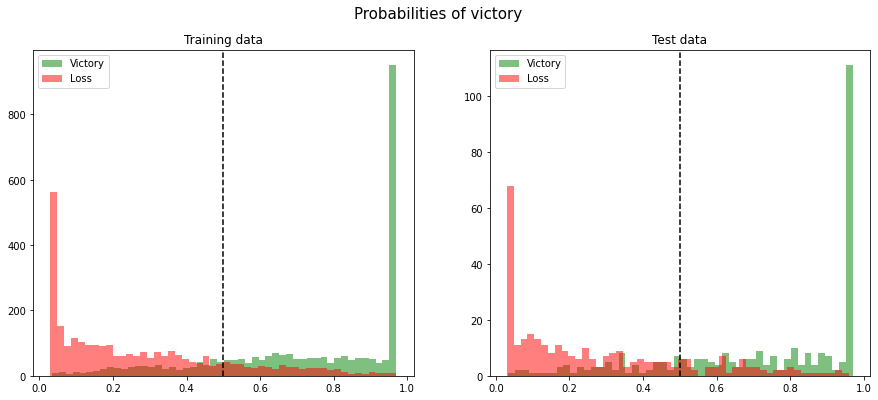

In [544]:
score = yearly_wrapper(train, test, y_train, y_test, oof_pred, test_pred, min_yr=2015, points=False)

In [545]:
coefs  = imp_coef['2019'].copy()

coefs.columns = ['mean_2019', 'std_2019']

for yr in ['2018', '2017', '2016', '2015']:
    tmp = imp_coef[yr].copy()
    tmp.columns = [f'mean_{yr}', f'std_{yr}']
    
    coefs = pd.merge(coefs, tmp, left_index=True, right_index=True)


coefs

,mean_2019,std_2019,mean_2018,std_2018,mean_2017,std_2017,mean_2016,std_2016,mean_2015,std_2015
feat,,,,,,,,,,
delta_opp_score,-4.597012,0.139546,-4.809117,0.151644,-5.181552,0.144564,-4.033073,0.161829,-5.226402,0.163036
delta_def_rating,3.702016,0.101298,3.675592,0.118360,4.125484,0.124565,3.208832,0.128470,3.988289,0.131280
seed_round1,2.694125,0.221175,2.582482,0.229499,2.634877,0.240121,2.543638,0.231719,2.631337,0.249013
seed_round2,2.628262,0.023575,2.588904,0.024573,2.615281,0.019361,2.417561,0.019111,2.716113,0.016832
delta_possessions,1.824516,0.054512,1.880341,0.065861,1.988168,0.072165,1.425974,0.080942,2.176205,0.083433
delta_Score,1.050631,0.029047,0.965699,0.029063,1.162366,0.024834,1.123434,0.016608,0.945807,0.028478
def_edge_Seed,-0.950131,0.039359,-0.987191,0.036146,-0.978031,0.027346,-0.989956,0.047069,-0.970180,0.053327
off_edge_Seed,-0.850680,0.031740,-0.875955,0.018374,-0.840217,0.024632,-0.876820,0.056644,-0.848143,0.060232
delta_Blk,0.483595,0.026705,0.485484,0.025808,0.479741,0.019769,0.537608,0.021449,0.443108,0.021229


In [546]:
for yr in test_pred.keys():
    tmp = test[yr].copy()
    tmp['true_label'] = y_test[yr]
    tmp['oof_pred'] = test_pred[yr]
    tmp['Season'] = yr
    tmp.to_csv(f'oof/2021_women_logit_{yr}.csv',index=False)

In [547]:
tmp = train['2019'].copy()
tmp['true_label'] = y_train[yr]
tmp['oof_pred'] = oof_pred[yr]
tmp.to_csv(f'oof/2021_women_logit_oof.csv',index=False)